## Install clip + autofaiss

In [1]:
!pip install clip-retrieval img2dataset autofaiss

     |████████████████████████████████| 1.4 MB 13.4 MB/s 
     |████████████████████████████████| 8.4 MB 16.3 MB/s 
     |████████████████████████████████| 87 kB 8.7 MB/s 
     |████████████████████████████████| 76 kB 5.7 MB/s 
     |████████████████████████████████| 64 kB 3.7 MB/s 
     |████████████████████████████████| 52 kB 1.7 MB/s 
  Created wheel for autofaiss: filename=autofaiss-1.3.0-py3-none-any.whl size=48780 sha256=78f88a5d535fc3273231ed722ef8bd4dcfa832d7ecba4c61aa7bf91ef8a7691e
  Stored in directory: /root/.cache/pip/wheels/a6/2f/e3/d2d4bda1af309cd9e86bd83652372762f5bae5460d4d5108cf
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115943 sha256=a9a2ecaa4a312b5c6e9f530d4dbeb41f1387779d5b4032232d018a554f5a9103
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41934 sha256=eb1f8693c149dda4dd1d24de8e1d363c2691206422a5ca97325fec6164

## Download dataset

In [56]:
!wget https://raw.githubusercontent.com/knok/pixabay-cat-images/master/classified-cat-jp-images.txt -O myimglist.txt

--2021-08-11 23:59:58--  https://raw.githubusercontent.com/knok/pixabay-cat-images/master/classified-cat-jp-images.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77377 (76K) [text/plain]
Saving to: ‘myimglist.txt’

myimglist.txt       100%[===================>]  75.56K  --.-KB/s    in 0.008s  

2021-08-11 23:59:59 (9.13 MB/s) - ‘myimglist.txt’ saved [77377/77377]



In [ ]:
# download pictures

In [57]:
!rm -rf image_folder

In [58]:
!img2dataset --url_list=myimglist.txt --output_folder=image_folder --thread_count=256 --image_size=256

1129it [00:00, 330174.96it/s]
100% 1129/1129 [00:10<00:00, 107.55it/s]


In [59]:
!ls image_folder/*

0.jpg	  1128.jpg  23.jpg   368.jpg  496.jpg  623.jpg	751.jpg  87.jpg
1000.jpg  112.jpg   240.jpg  369.jpg  497.jpg  624.jpg	752.jpg  880.jpg
1001.jpg  113.jpg   241.jpg  36.jpg   498.jpg  625.jpg	753.jpg  881.jpg
1002.jpg  114.jpg   242.jpg  370.jpg  499.jpg  626.jpg	754.jpg  882.jpg
1003.jpg  115.jpg   243.jpg  371.jpg  49.jpg   627.jpg	755.jpg  883.jpg
1004.jpg  116.jpg   244.jpg  372.jpg  4.jpg    628.jpg	756.jpg  884.jpg
1005.jpg  117.jpg   245.jpg  373.jpg  500.jpg  629.jpg	757.jpg  885.jpg
1006.jpg  118.jpg   246.jpg  374.jpg  501.jpg  62.jpg	758.jpg  886.jpg
1007.jpg  119.jpg   247.jpg  375.jpg  502.jpg  630.jpg	759.jpg  887.jpg
1008.jpg  11.jpg    248.jpg  376.jpg  503.jpg  631.jpg	75.jpg	 888.jpg
1009.jpg  120.jpg   249.jpg  377.jpg  504.jpg  632.jpg	760.jpg  889.jpg
100.jpg   121.jpg   24.jpg   378.jpg  505.jpg  633.jpg	761.jpg  88.jpg
1010.jpg  122.jpg   250.jpg  379.jpg  506.jpg  634.jpg	762.jpg  890.jpg
1011.jpg  123.jpg   251.jpg  37.jpg   507.jpg  635.jpg	763.jpg  891.jp

## Build clip image embeddings

In [60]:
!rm -rf embedding_folder

In [61]:
!clip-retrieval batch  --dataset_path image_folder --output_folder embedding_folder

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100% 5/5 [00:05<00:00,  1.05s/it]


In [62]:
!ls embedding_folder

image.index  image_list  img_emb.npy


In [63]:
with open("embedding_folder/image_list") as f:
    image_list = [x for x in f.read().split("\n") if x != ""]

## Build the index

In [64]:
!rm -rf my_index_folder

In [65]:
# Build a KNN index
!autofaiss quantize --embeddings_path="embedding_folder" \
                    --output_path="my_index_folder" \
                    --metric_type="ip" \
                    --max_index_query_time_ms=5 \
                    --max_index_memory_usage="1GB"

Launching the whole pipeline 08/12/2021, 00:00:56
	Compute estimated construction time of the index 08/12/2021, 00:00:56
		-> Train: 16.7 minutes
		-> Add: 0.0 seconds
		Total: 16.7 minutes
	>>> Finished "Compute estimated construction time of the index" in 0.0001 secs
	Checking that your have enough memory available to create the index 08/12/2021, 00:00:56
	>>> Finished "Checking that your have enough memory available to create the index" in 0.0004 secs
	Selecting most promising index types given data characteristics 08/12/2021, 00:00:56
	>>> Finished "Selecting most promising index types given data characteristics" in 0.0024 secs
	Creating the index 08/12/2021, 00:00:56
		-> Instanciate the index HNSW15 08/12/2021, 00:00:56
		>>> Finished "-> Instanciate the index HNSW15" in 0.0027 secs
		-> Extract training vectors 08/12/2021, 00:00:56
100% 1/1 [00:00<00:00, 1772.74it/s]
		>>> Finished "-> Extract training vectors" in 0.0061 secs
		-> Training the index with 1129 vectors of dim 512 

In [66]:
!ls my_index_folder

'HNSW15-efSearch=16383.index'


## Load the index

In [67]:
import faiss
import numpy as np
ind = faiss.read_index("my_index_folder/HNSW15-efSearch=16383.index")

## Simple image query from dataset

query :


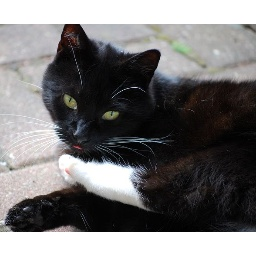

results :
similarity= 0.99935955
600


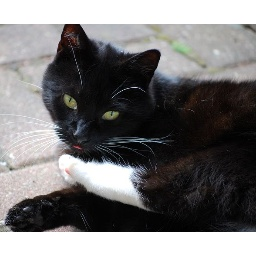

similarity= 0.9325836
320


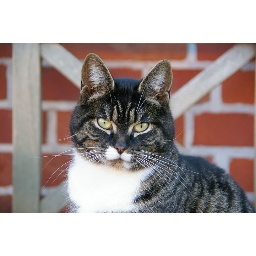

similarity= 0.93186533
12


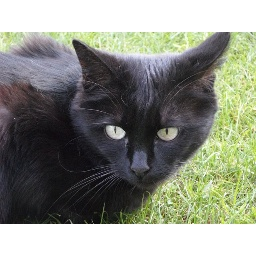

similarity= 0.92870843
570


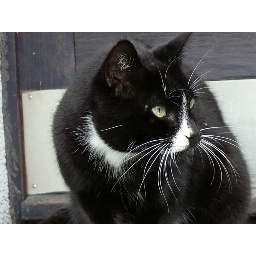

similarity= 0.9276604
398


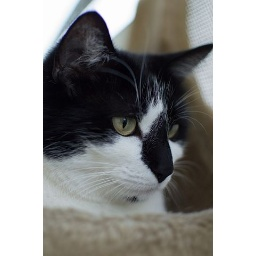

In [69]:
image_number = 600
from IPython.display import Image
print("query :")
display(Image(filename=image_list[image_number])) 

D, I = ind.search(np.expand_dims(ind.reconstruct(image_number), 0), 5)
print("results :")
for d, i in zip(D[0], I[0]):
  print("similarity=", d)
  print(i)
  display(Image(filename=image_list[i])) 

## Text to image query

In [76]:
import clip
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device, jit=False)

query :
a white cat with blue eyes
results :
similarity= 0.34641433
905


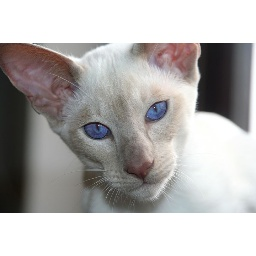

similarity= 0.33463004
591


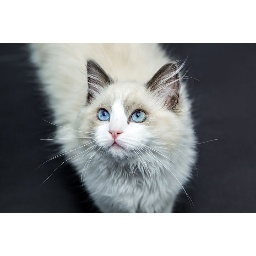

similarity= 0.3332157
210


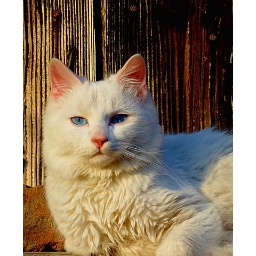

similarity= 0.3301032
1095


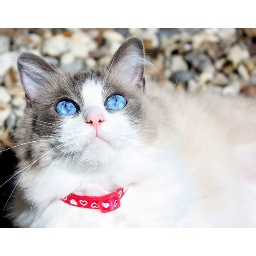

similarity= 0.32439187
341


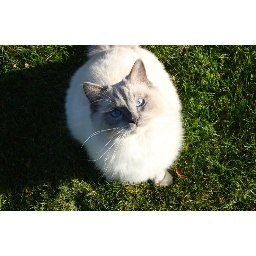

In [74]:
from IPython.display import Image

text = "a white cat with blue eyes"
text_tokens = clip.tokenize([text], truncate=True)

text_features = model.encode_text(text_tokens.to(device))
text_features /= text_features.norm(dim=-1, keepdim=True)
text_embeddings = text_features.cpu().detach().numpy().astype('float32')

print("query :")
print(text)

D, I = ind.search(text_embeddings, 5)
print("results :")
for d, i in zip(D[0], I[0]):
  print("similarity=", d)
  print(i)
  display(Image(filename=image_list[i])) 

## Image to image query

--2021-08-12 00:12:21--  https://thiscatdoesnotexist.com/
Resolving thiscatdoesnotexist.com (thiscatdoesnotexist.com)... 95.216.76.20
Connecting to thiscatdoesnotexist.com (thiscatdoesnotexist.com)|95.216.76.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 164012 (160K) [image/jpeg]
Saving to: ‘newcat.jpg’

newcat.jpg          100%[===================>] 160.17K   494KB/s    in 0.3s    

2021-08-12 00:12:22 (494 KB/s) - ‘newcat.jpg’ saved [164012/164012]

query :


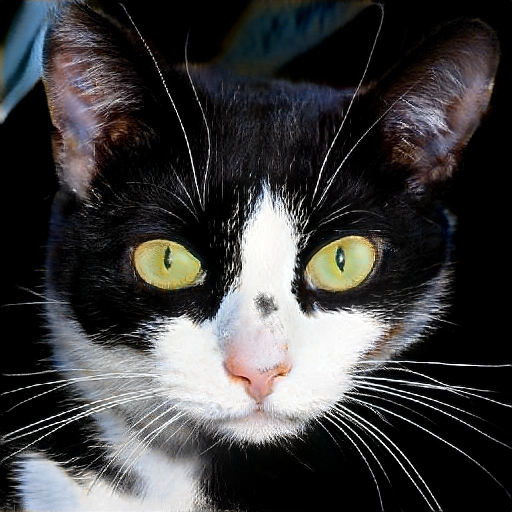

results :
similarity= 0.9142024
315


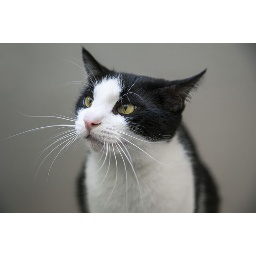

similarity= 0.90784425
678


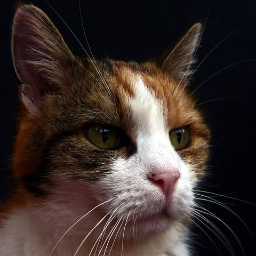

similarity= 0.90682137
496


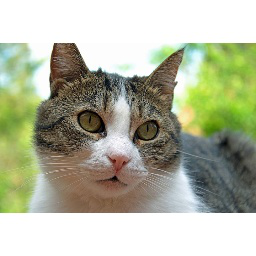

similarity= 0.9041809
949


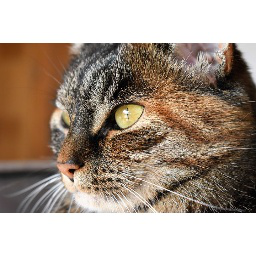

similarity= 0.9040538
733


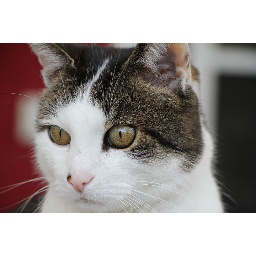

In [84]:
!rm newcat.jpg
!wget https://thiscatdoesnotexist.com/ -O newcat.jpg

from PIL import Image

image = Image.open("newcat.jpg")
image_tensor = preprocess(image)

image_features = model.encode_image(torch.unsqueeze(image_tensor.to(device), dim=0))
image_features /= image_features.norm(dim=-1, keepdim=True)

image_embeddings = image_features.cpu().detach().numpy().astype('float32')

print("query :")
display(image) 

D, I = ind.search(image_embeddings, 5)
print("results :")
for d, i in zip(D[0], I[0]):
  print("similarity=", d)
  print(i)
  display(Image.open(image_list[i])) 